In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # visualization tool
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
#from sklearn import datasets ## imports datasets from scikit-learn
#data = datasets.load_boston()

In [2]:
#df = pd.DataFrame(data.data, columns=data.feature_names)
#df.head()

In [10]:
#train_dt = pd.read_csv("C:/Users/skunwor.CBA/Google Drive/Data Analytics Club/boston_train.csv")
train_dt = pd.read_csv("~skunwor/Desktop/boston_train.csv")


In [17]:
train_dt.head()
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [18]:
#train_dt.drop('ID', axis = 1, inplace=True)
train_dt.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


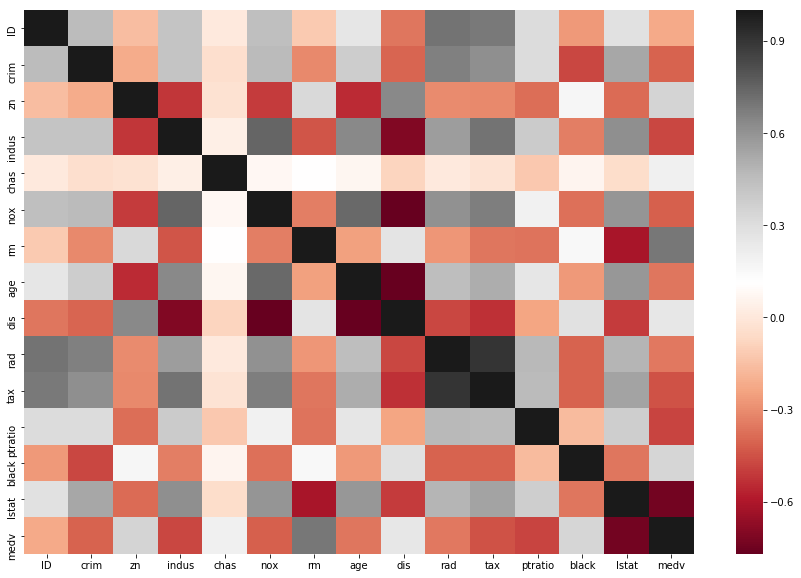

In [20]:
plt.subplots(figsize=(15,10))
sns.heatmap(train_dt.corr(), cmap = 'RdGy')

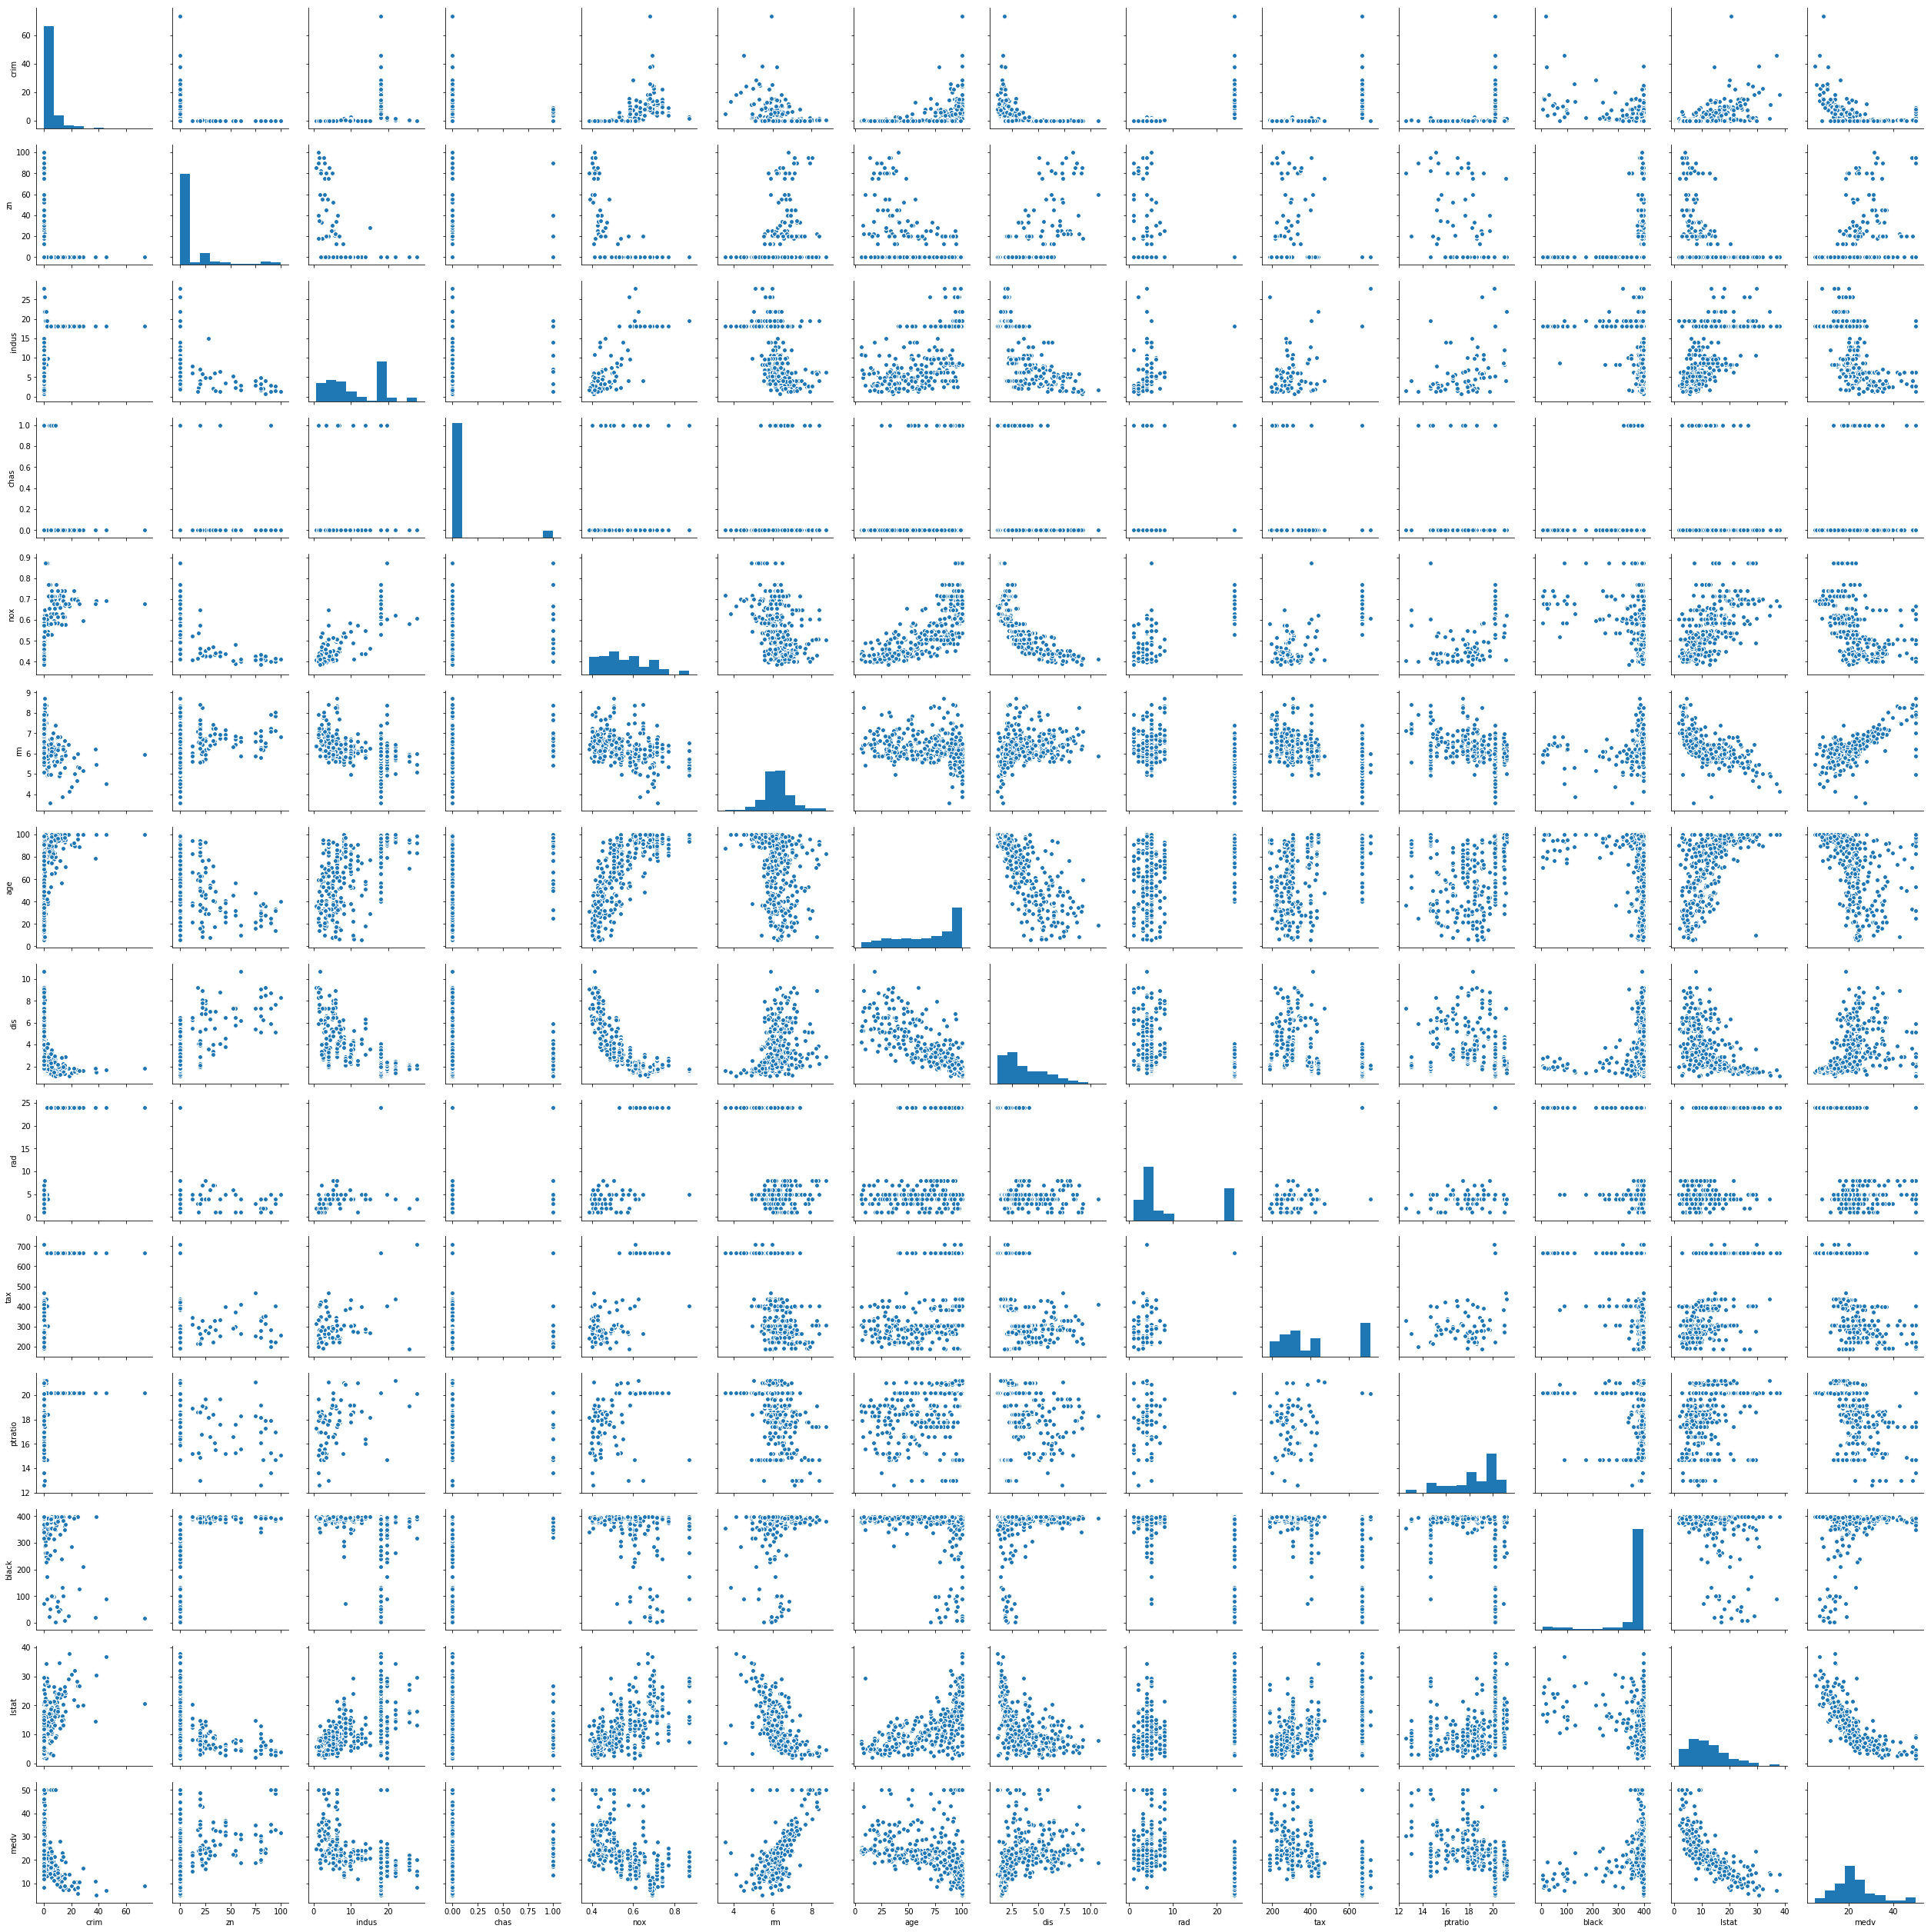

In [153]:
sns.pairplot(train_dt, vars = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv'])

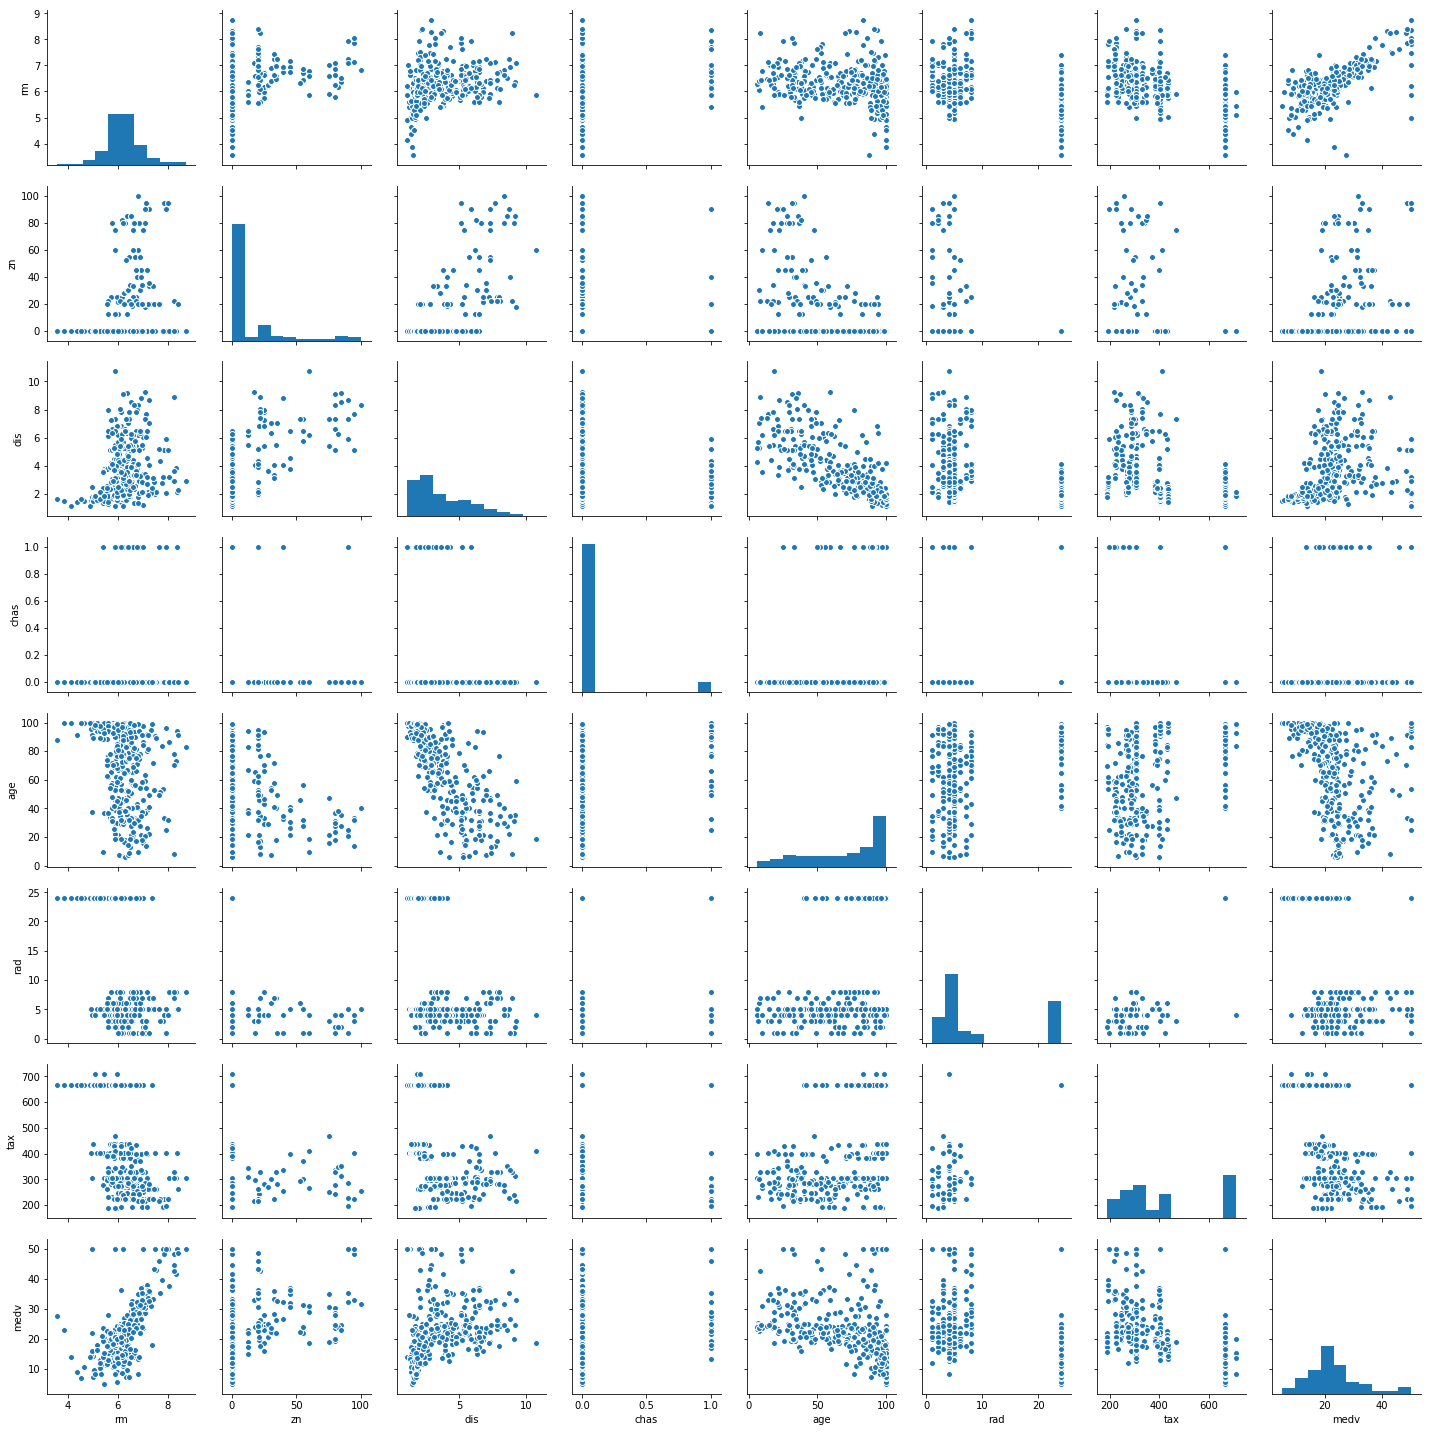

In [155]:
sns.pairplot(train_dt, vars = ['rm', 'zn', 'dis', 'chas','age','rad','tax','medv'])

/Users/skunwor/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.00333667, 0.01334668, 0.00834168, 0.02168836, 0.03169837,
        0.03169837, 0.0333667 , 0.05338672, 0.06840174, 0.0667334 ,
        0.07674341, 0.02002002, 0.02002002, 0.01167835, 0.01668335,
        0.01668335, 0.01167835, 0.01167835, 0.00333667, 0.00166834,
        0.00333667, 0.00333667, 0.00333667, 0.        , 0.02335669]),
 array([ 5. ,  6.8,  8.6, 10.4, 12.2, 14. , 15.8, 17.6, 19.4, 21.2, 23. ,
        24.8, 26.6, 28.4, 30.2, 32. , 33.8, 35.6, 37.4, 39.2, 41. , 42.8,
        44.6, 46.4, 48.2, 50. ]),
 <a list of 25 Patch objects>)

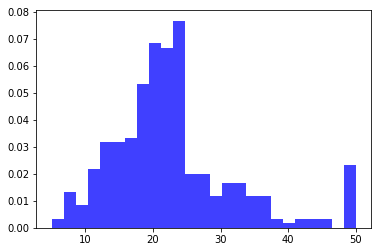

In [21]:
plt.hist(train_dt['medv'],25,normed=1, facecolor='blue',alpha = 0.75)

In [24]:
X = train_dt[['rm', 'zn', 'dis', 'chas','age','rad','tax','nox']]
Y = train_dt[['medv']]

In [ ]:
#Y_mod = train_dt['medv']**2
#plt.hist(Y_mod,50,normed=1, facecolor='blue',alpha = 0.75)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [26]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
predictions = lm.predict(X_test)

Text(0,0.5,'Predicted Y')

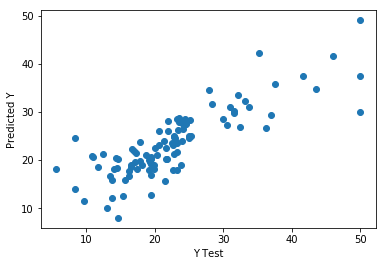

In [28]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [29]:

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.66928509249915
MSE: 25.30581880408153
RMSE: 5.030488922965792


In [30]:
coefficients = pd.DataFrame(X.columns)
coefficients['coefficients']=lm.coef_[0]
coefficients


,0,coefficients
0,rm,6.788455
1,zn,0.070139
2,dis,-1.765398
3,chas,6.287350
4,age,-0.065728
5,rad,0.213480
6,tax,-0.014982
7,nox,-19.388072


In [85]:
lm.intercept_

array([-0.54443234])

In [101]:
model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X_test)

In [102]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     759.7
Date:                Tue, 18 Sep 2018   Prob (F-statistic):          1.28e-197
Time:                        10:21:11   Log-Likelihood:                -1063.5
No. Observations:                 333   AIC:                             2141.
Df Residuals:                     326   BIC:                             2168.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rm             6.6197      0.290     22.797      0.000       6.048       7.191
zn             0.0671      0.019      3.546      0.000       0.030       0.104
dis           -1.6265      0.256     -6.353      0.000      -2.130      -1.123
chas           5.0971      1.396      3.650      0.000       2.350       7.844
age           -0.0964      0.017     -5.572      0.000      -0.130      -0.062
rad            0.1565      0.085      1.839      0.067      -0.011       0.324
tax           -0.0210      0.004     -4.841      0.000      -0.030      -0.012
==============================================================================
Omnibus:                      183.736   Durbin-Watson:                   0.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1610.147
Skew:                           2.140   Prob(JB):                         0.00
Kurtosis:                      12.886   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
import numpy as np

np.logspace(2, 2, 5)

array([100., 100., 100., 100., 100.])

In [7]:
np.logspace(1, 10, 5)

array([1.00000000e+01, 1.77827941e+03, 3.16227766e+05, 5.62341325e+07,
       1.00000000e+10])